# Exploratory Data Analysis

**Team:** XOH - SOOMI OH, YOO MI OH

**Date:** February 2026  

---

## Purpose

This notebook provides comprehensive exploratory analysis of the StatsBomb dataset to support our tactical analysis project. 

Our goal is to build the prediction framework that covers below:

1. **Tactical DNA** : Cluster teams into 6-8 archetypes using 8 dimensions
2. **Player Quality** : Calculate decay-weighted scores using 10 dimensions
3. **System Fit** : Measure tactical friction and modifiers
4. **2026 Predictions** : Forecast Men's World Cup & Women's Euro

This exploratory analysis reveals the dataset's readiness for the above prediction framework.

**Key Focus:** Recent tournament data (2022-2025) enables modern tactical analysis.

**For Executive Summary:** See `EDA_Executive.ipynb`


---

## Setup & Imports

In [1]:
# Import eda template functions

import sys
from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from eda.eda_starter_template import (
    header, sub, dist, desc, top, safe_run,
    analyze_sb_matches,
    analyze_sb_events,
    analyze_sb_lineups,
    analyze_sb_360,
    STATSBOMB_DIR
)

# Import prediction-focused exploration functions
import sys
from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from src.eda_functions import (
    analyze_tournament_coverage,
    analyze_metric_data_readiness,
    analyze_prediction_framework_readiness,
    plot_tournament_timeline,
    plot_framework_pipeline,
    plot_tactical_diversity_heatmap,
    plot_player_trajectory_concept,
    generate_summary_stats,
)

print("Template functions imported")
print("Prediction framework functions imported")
print(f"Data directory: {STATSBOMB_DIR}")

Template functions imported
Prediction framework functions imported
Data directory: /Users/yoomioh/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/2026 Spring/Capstone/soccer-analytics-capstone-XOh/data/Statsbomb


---

# 1. Initial Dataset Exploration

In [2]:
# Matches overview
matches_results = safe_run(analyze_sb_matches, 'matches')


  STATSBOMB: MATCHES
Total matches: 3,464

--- Competition Distribution ---
shape: (10, 2)
┌─────────────────────────┬───────┐
│ competition_name        ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ La Liga                 ┆ 868   │
│ Ligue 1                 ┆ 435   │
│ Premier League          ┆ 418   │
│ Serie A                 ┆ 381   │
│ 1. Bundesliga           ┆ 340   │
│ FA Women's Super League ┆ 326   │
│ FIFA World Cup          ┆ 147   │
│ Women's World Cup       ┆ 116   │
│ Indian Super league     ┆ 115   │
│ UEFA Euro               ┆ 102   │
└─────────────────────────┴───────┘

--- Season Distribution ---
shape: (10, 2)
┌─────────────┬───────┐
│ season_name ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ 2015/2016   ┆ 1824  │
│ 2020/2021   ┆ 166   │
│ 2018/2019   ┆ 143   │
│ 2021/2022   ┆ 141   │
│ 2023        ┆ 122   │
│ 2019/2020   ┆ 120   │
│ 2018        ┆ 100   │


In [3]:
# Events overview
events_results = safe_run(analyze_sb_events, 'events')


  STATSBOMB: EVENTS
Events: 12,188,949 | Matches: 3,464 | Types: 35

--- Event Type Distribution ---
shape: (15, 2)
┌────────────────┬─────────┐
│ type           ┆ count   │
│ ---            ┆ ---     │
│ str            ┆ u32     │
╞════════════════╪═════════╡
│ Pass           ┆ 3387760 │
│ Ball Receipt*  ┆ 3167310 │
│ Carry          ┆ 2632570 │
│ Pressure       ┆ 1113859 │
│ Ball Recovery  ┆ 366673  │
│ …              ┆ …       │
│ Foul Committed ┆ 100510  │
│ Miscontrol     ┆ 99391   │
│ Foul Won       ┆ 95596   │
│ Dispossessed   ┆ 88814   │
│ Shot           ┆ 88023   │
└────────────────┴─────────┘

--- Shot Analysis ---
Total shots: 88,023

--- Pass Analysis ---
Passes: 3,387,760 | Success rate: 77.7%

--- Most Active Players ---
shape: (10, 2)
┌────────────────────────────────┬────────┐
│ player                         ┆ count  │
│ ---                            ┆ ---    │
│ str                            ┆ u32    │
╞════════════════════════════════╪════════╡
│ Lionel Andrés Mess

In [4]:
# Lineups overview
lineups_results = safe_run(analyze_sb_lineups, 'lineups')


  STATSBOMB: LINEUPS
Records: 165,820 | Matches: 3,464 | Players: 10,808

--- Position Distribution ---
shape: (10, 2)
┌───────────────────────┬───────┐
│ position_name         ┆ count │
│ ---                   ┆ ---   │
│ str                   ┆ u32   │
╞═══════════════════════╪═══════╡
│ null                  ┆ 34179 │
│ Center Forward        ┆ 9325  │
│ Right Center Back     ┆ 9021  │
│ Left Center Back      ┆ 8888  │
│ Right Wing            ┆ 8780  │
│ Left Wing             ┆ 8653  │
│ Right Back            ┆ 8431  │
│ Left Back             ┆ 8103  │
│ Goalkeeper            ┆ 7029  │
│ Right Center Midfield ┆ 6872  │
└───────────────────────┴───────┘

Total cards: 19,606


---

# 2. Critical Findings

The intial exploratory analysis reveals three key findings.

## Finding 1: Recent Tournament Data

In [5]:
tournament_stats = analyze_tournament_coverage(STATSBOMB_DIR)


  TOURNAMENT DATA DISCOVERY

Total Tournament Matches Found: 466

--------------------------------------------------------------------------------
BREAKDOWN BY COMPETITION & YEAR:
--------------------------------------------------------------------------------

Recent tournaments:
  - 2025 UEFA Women's Euro                       :  31 matches
  - 2024 Copa America                            :  32 matches
  - 2024 UEFA Euro                               :  51 matches
  - 2023 Women's World Cup                       :  64 matches
  - 2022 FIFA World Cup                          :  64 matches
  - 2022 UEFA Women's Euro                       :  31 matches

  - Total recent (2022+): 273 matches

Older tournaments:
    - 2021 UEFA Euro                               :  51 matches
    - 2019 Women's World Cup                       :  52 matches
    - 2018 FIFA World Cup                          :  64 matches
    - 1990 FIFA World Cup                          :   1 matches
    - 1989 UEFA Euro

**2015/16 Club Matches: 1,824**
- Most complete single-season club dataset
- Can serve as tactical baseline (archetype taxonomy)

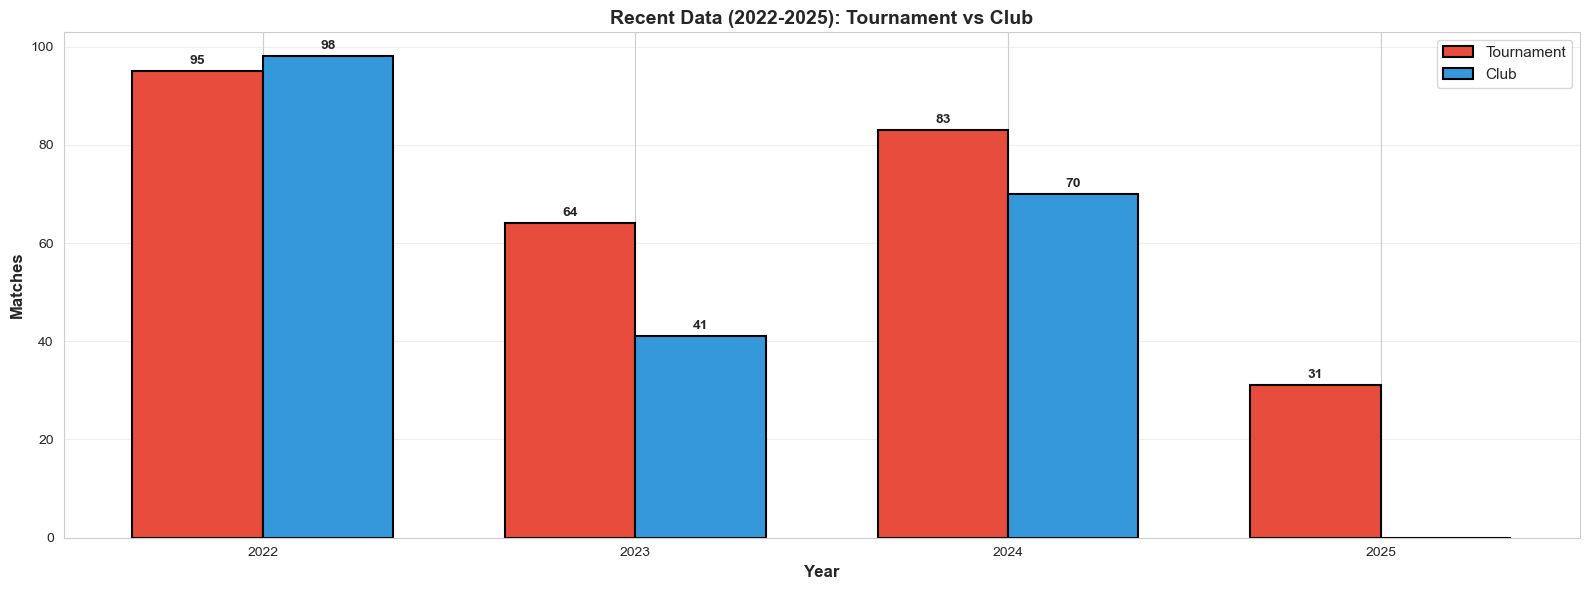

In [6]:
plot_tournament_timeline(STATSBOMB_DIR)

### Insight:

**We have recent tournament data (2022-2025):**
- 2022 FIFA World Cup
- 2024 UEFA Euro & Copa America
- Plus complete club baseline (2015/16: 1,823 matches)

**Question raised:** Do tactical systems compress under tournament pressure?

## Finding 2: Multi-Dimensional Tactical Profiling

In [7]:
metric_stats = analyze_metric_data_readiness(STATSBOMB_DIR)


  METRIC CALCULATION READINESS

TEAM ARCHETYPE METRICS (8 Dimensions):
--------------------------------------------------------------------------------
  Pressure       :  1,113,859 ( 9.14%) → PPDA
  Pass           :  3,387,760 (27.79%) → Field Tilt, Possession %, EPR, Progression
  Carry          :  2,632,570 (21.60%) → Field Tilt, Possession %, EPR, Progression
  Shot           :     88,023 ( 0.72%) → xG Totals, xG Buildup
  Clearance      :    158,993 ( 1.30%) → Defensive Line Height

PLAYER QUALITY METRICS (10 Dimensions):
--------------------------------------------------------------------------------
  Shot           :     88,023 ( 0.72%) → Finishing Quality (goals - xG)
  Pass           :  3,387,760 (27.79%) → Progressive Passes, Network, Packing
  Carry          :  2,632,570 (21.60%) → Progressive Carries
  Pressure       :  1,113,859 ( 9.14%) → Pressure Quality, Defensive Actions
  Interception   :     79,641 ( 0.65%) → Defensive Actions

CRITICAL DATA QUALITY:
--------------

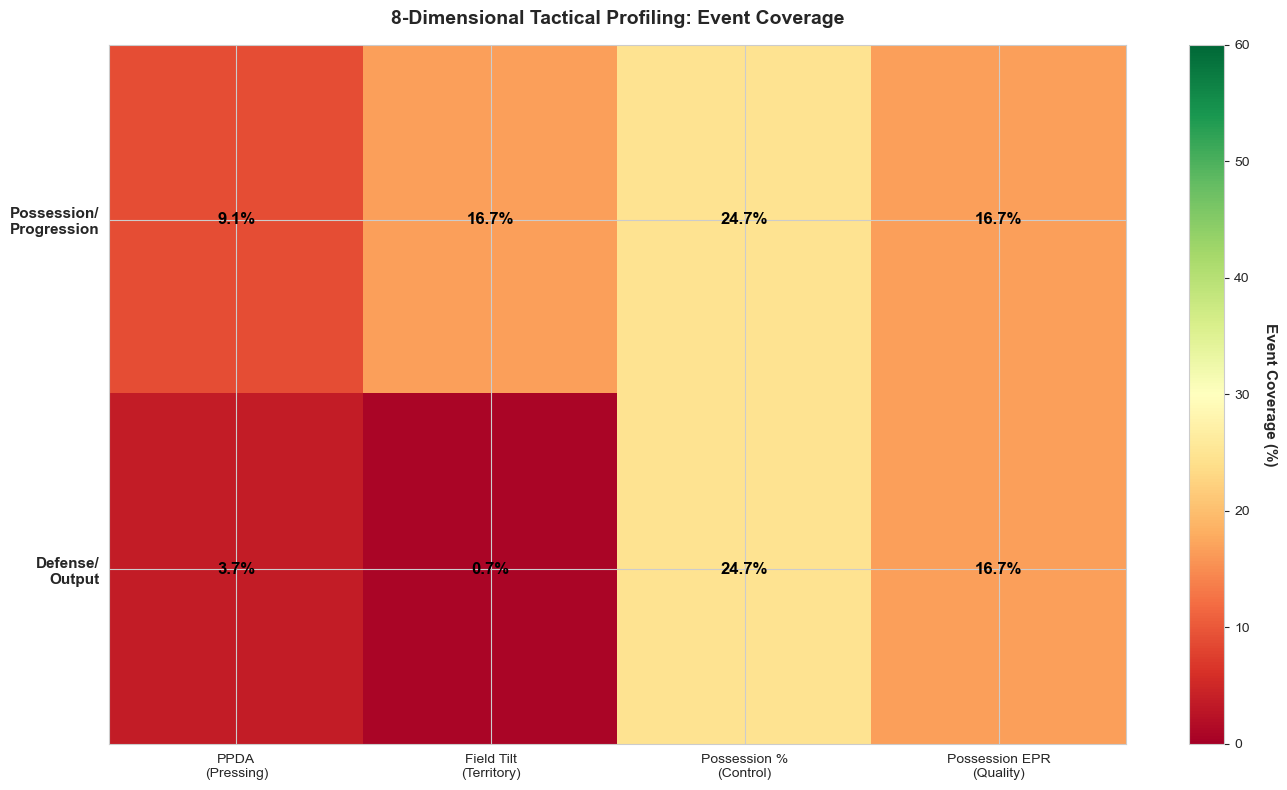

In [8]:
plot_tactical_diversity_heatmap(STATSBOMB_DIR)

### Insight:

**We can profile teams on 8 tactical dimensions:**
- Pressing, Territory, Possession, Build-up, Defense, Output
- All dimensions have sufficient event coverage

**Question raised:** Can we cluster teams into tactical archetypes?

## Finding 3: Player Trajectories Over Time

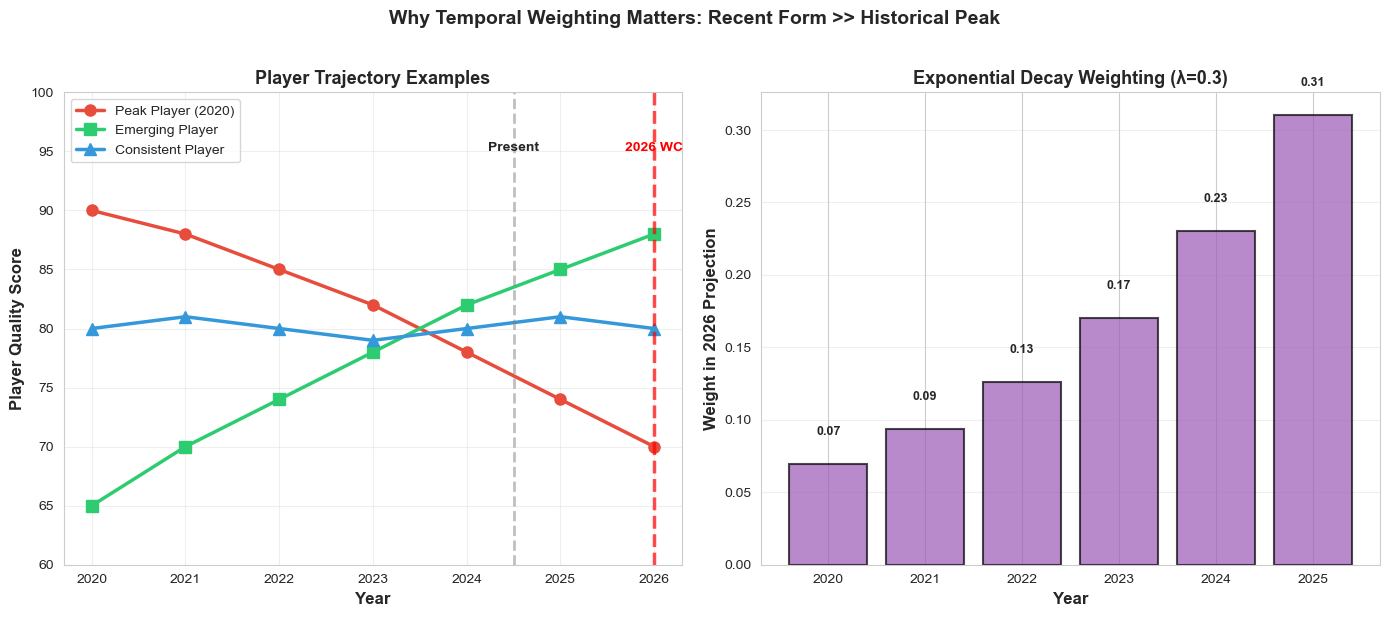

In [9]:
plot_player_trajectory_concept(STATSBOMB_DIR)

### Insight:

**Players follow trajectories:**
- 10,803 players across years
- Some are declining (peak to decline) while others are emerging (rise to peak)
- Recent form matters more than historical peak

**Question raised:** Can we project player quality to 2026?

# 3 Metric Design for Framework

Based on our findings on recent tournament data, having rich event coverage and player pool, 
we need metrics that enable tactical profiling and prediction. Here's our design:

- **8 team dimensions (tactical triangle coverage)**
- **10 player dimensions (position-specific quality)**


## Team Metrics: 8-Dimensional Tactical Profiling

Our framework requires metrics that:
1. Cover all tactical aspects (Possession/Progression/Defense)
2. Are non-redundant (each measures something different)
3. Support clustering (optimal 6-10 features for K-means)

### The Tactical Triangle

**POSSESSION (Control):**
- **Possession %** - Ball control baseline
- **Possession EPR** - Quality over quantity (Expected Possession Ratio)

**PROGRESSION (Movement):**  
- **Progression Ratio** - Pass vs Carry style
- **xG Buildup** - Attacking sequence quality

**DEFENSE (Structure):**
- **PPDA** - Pressing intensity (Passes Per Defensive Action)
  - Low = aggressive press, High = passive block
- **Defensive Line Height** - Positioning choice

**OUTPUT (Results):**
- **Field Tilt** - Territorial dominance
- **xG Totals** - Attacking threat

**Why 8?**
- Covers tactical triangle completely 
- Each metric independent (low correlation) 
- Optimal for K-means clustering 
- Interpretable for coaches/analysts 

---

## Player Metrics: 10-Dimensional Quality Scoring

Position-specific features enable fair comparison:

**Attackers (6 features):**
- Finishing (goals - xG), Dribbling, Off-ball movement, Link-up play

**Midfielders (8 features - most diverse):**
- Playmaking, Work rate, Defensive contribution, Build-up quality

**Defenders (6 features):**
- Build-up from back, Ball progression, Defensive volume, Pressing quality

**Why position-specific?**
- Fair comparison (CB vs CB, not CB vs ST) 
- Role-appropriate (finishing matters for strikers) 
- Captures modern game (build-up from defenders) 

---

## Summary

Our 8 team dimensions capture **how teams play (pressing intensity, territorial control, build-up style, defensive structure)** and **enable clustering into 6-8 tactical archetypes** like "High Press" or "Patient Possession." 

The 10 player dimensions **measure individual quality across position-specific skills**, weighted by recency to project 2026 performance rather than relying on static historical averages. Critically, combining both metric sets reveals **system fit whether a squad's player traits align with their tactical archetype's 
demands** (e.g., high-press teams need aggressive, mobile players). 

This integrated approach produces tournament readiness scores that reflect not just talent or tactics alone, but the crucial interaction between squad capabilities and tactical requirements under tournament pressure.